In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pima-indians-diabetes-database/diabetes.csv


In [2]:
# Importing required library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importing dataset
pima = pd.read_csv('/kaggle/input/pima-indians-diabetes-database/diabetes.csv')
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
pima.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
# Independent variable
ind_var=pima[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
# dependent variable
dep_var=pima.Outcome

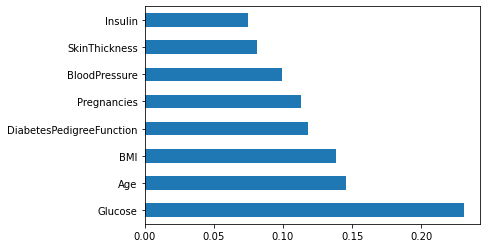

In [5]:
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
model.fit(ind_var,dep_var)
# Print(model.feature_importances_)
feat_imp = pd.Series(model.feature_importances_,index=ind_var.columns)
feat_imp.nlargest(8).plot(kind='barh')
plt.show()

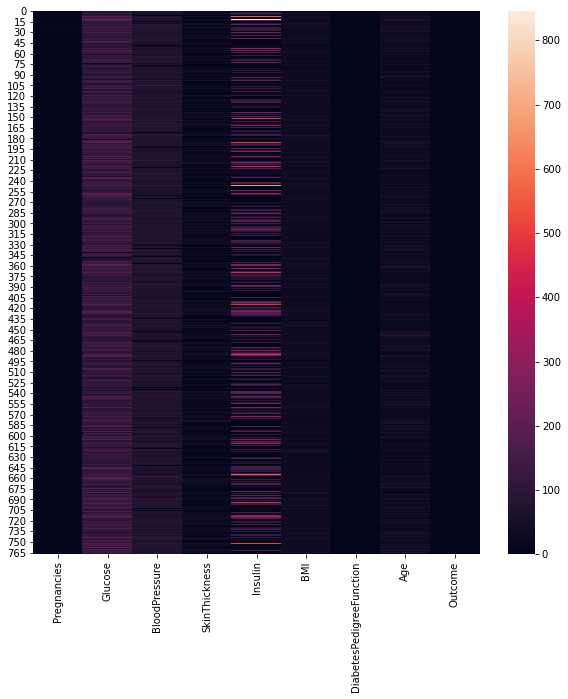

In [6]:
cor_mat=pima.corr()
top=cor_mat.index
plt.figure(figsize=(10,10))
g=sns.heatmap(pima[top])

In [7]:
from sklearn.metrics import classification_report, accuracy_score  
from sklearn.metrics import precision_score, recall_score 
from sklearn.metrics import f1_score, matthews_corrcoef 
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(ind_var,dep_var,test_size=0.25,random_state=0)

In [8]:
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(solver='liblinear')
lr_model.fit(X_train,y_train)
y_pred_logistic=lr_model.predict(X_test)

In [9]:
# K- Nearest Neighbor
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=9)
y_pred_knn = knn_model.fit(X_train, y_train).predict(X_test)

In [10]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
y_pred_navie= nb_model.fit(X_train, y_train).predict(X_test)

In [11]:
from sklearn.svm import LinearSVC
svc_model = LinearSVC(random_state=0)
y_pred_svc = svc_model.fit(X_train, y_train).predict(X_test)

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [12]:
from sklearn.tree import DecisionTreeClassifier
dtc_model = DecisionTreeClassifier()
y_pred_dtc = dtc_model.fit(X_train, y_train).predict(X_test)

In [13]:
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier()
y_pred_rfc = rfc_model.fit(X_train, y_train).predict(X_test)

In [14]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier()
y_pred_xgb = xgb_model.fit(X_train, y_train).predict(X_test)

In [15]:
import math as mt
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_logistic))
print("Precision:",metrics.precision_score(y_test, y_pred_logistic))
print("Recall:",metrics.recall_score(y_test, y_pred_logistic))
print("F-Score:",metrics.f1_score(y_test, y_pred_logistic))

Accuracy: 0.8072916666666666
Precision: 0.7659574468085106
Recall: 0.5806451612903226
F-Score: 0.6605504587155964


In [16]:
print("Accuracy for K neighbor Classifier :",metrics.accuracy_score (y_test, y_pred_knn))
print("Precision for K neighbor Classifier :", metrics.precision_score(y_test, y_pred_knn))
print("Recall for K neighbor Classifier :", metrics.recall_score(y_test, y_pred_knn))
print("F-Score for K neighbor Classifier :",metrics.f1_score(y_test, y_pred_knn))

Accuracy for K neighbor Classifier : 0.7708333333333334
Precision for K neighbor Classifier : 0.6666666666666666
Recall for K neighbor Classifier : 0.5806451612903226
F-Score for K neighbor Classifier : 0.6206896551724138


In [17]:
print("Accuracy for naive baiyes :",metrics.accuracy_score(y_test, y_pred_navie))
print("Precision for naive baiyes :",metrics.precision_score(y_test, y_pred_navie))
print("Recall for naive baiyes :",metrics.recall_score(y_test, y_pred_navie))
print("F-Score for naive baiyes :",metrics.f1_score(y_test, y_pred_navie))

Accuracy for naive baiyes : 0.765625
Precision for naive baiyes : 0.673469387755102
Recall for naive baiyes : 0.532258064516129
F-Score for naive baiyes : 0.5945945945945945


In [18]:
print("Accuracy for Support vector machine :",metrics.accuracy_score(y_test, y_pred_svc))
print("Precision for Support vector machine :",metrics.precision_score(y_test, y_pred_svc))
print("Recall for Support vector machine :",metrics.recall_score(y_test, y_pred_svc))
print("F-Score for Support vector machine :",metrics.f1_score(y_test, y_pred_svc))

Accuracy for Support vector machine : 0.6822916666666666
Precision for Support vector machine : 1.0
Recall for Support vector machine : 0.016129032258064516
F-Score for Support vector machine : 0.031746031746031744


In [19]:
print("Accuracy for Decision tree classifier :",metrics.accuracy_score(y_test, y_pred_dtc))
print("Recall for Decision tree classifier :",metrics.recall_score(y_test, y_pred_dtc))
print("F-Score for Decision tree classifier :",metrics.f1_score(y_test, y_pred_dtc))

Accuracy for Decision tree classifier : 0.7447916666666666
Recall for Decision tree classifier : 0.6129032258064516
F-Score for Decision tree classifier : 0.608


In [20]:
print("Accuracy for Random forest classifier :",metrics.accuracy_score(y_test, y_pred_rfc))
print("Precision for Random forest classifier :",metrics.precision_score(y_test,y_pred_rfc))
print("Recall for Random forest classifier :",metrics.recall_score(y_test, y_pred_rfc))
print("F-Score for Random forest classifier :",metrics.f1_score(y_test, y_pred_rfc))

Accuracy for Random forest classifier : 0.7760416666666666
Precision for Random forest classifier : 0.6862745098039216
Recall for Random forest classifier : 0.5645161290322581
F-Score for Random forest classifier : 0.6194690265486725


In [21]:
log = metrics.accuracy_score(y_test, y_pred_logistic)
knn = metrics.accuracy_score(y_test, y_pred_knn)
navie = metrics.accuracy_score(y_test, y_pred_navie)
svc= metrics.accuracy_score(y_test, y_pred_svc)
dtc = metrics.accuracy_score(y_test, y_pred_dtc)
rfc = metrics.accuracy_score(y_test, y_pred_rfc)
xgb = metrics.accuracy_score(y_test, y_pred_xgb)
model = ['LR','KNN','NAVIE','SVC','DTC','RFC', 'XGB']
accuracy=[log,knn,navie,svc,dtc,rfc, xgb]
data = pd.DataFrame({'Model': model, 'Score': accuracy})
print(data)

   Model     Score
0     LR  0.807292
1    KNN  0.770833
2  NAVIE  0.765625
3    SVC  0.682292
4    DTC  0.744792
5    RFC  0.776042
6    XGB  0.760417


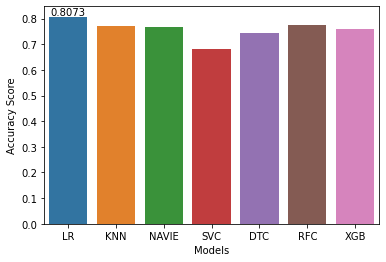

In [22]:
a = sns.barplot(x = 'Model', y = 'Score', data = data)
a.set(xlabel='Models', ylabel='Accuracy Score')
for p in a.patches:
    height = p.get_height()
    a.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center")
    plt.show()